# Project2: Anomaly Detection for Exotic Event Identification at the Large Hadron Collider 




## Brief Introduction to the Standard Model and Large Hadron Collider


The Standard model (SM) of Particle Physics is the most complete model physicists have for understanding the interactions of the fundamental particles in the universe. The elementary particles of the SM are shown in Fig.1.

---
<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Standard_Model_of_Elementary_Particles.svg/627px-Standard_Model_of_Elementary_Particles.svg.png" alt="SM" style="width: 600px;"/>
    <figcaption>Fig.1 - Elementary particles of the Standard Model.</figcaption>
</figure>

---

It is comprised of matter particles (**fermions**):
- **leptons**
    - electrons
    - muon
    - tau
    - and respective neutrinos
- **quarks** which are the building blocks of protons

as well as force carrier particles (**bosons**):
- photon and W/Z bosons (electroweak force)
- gluons (strong force)

and the Higgs boson which is attributed to the mechanism which gives particles their mass.


Though the SM has experimentally stood the test of time, many outstanding questions about the universe and the model itself remain, and scientist continue to probe for inconsistencies in the SM in order to find new physics. More exotic models such as **Supersymmetry (SUSY)** predic mirror particles which may exist and have alluded detection thus far. 

---

The **Large Hadron Collider** (LHC) is a particle smasher capable of colliding protons at a centre of mass energy of 14 TeV.
**ATLAS** is general purpouse particle detectors tasked with recording the remnants of proton collisions at the collicion point. The main purpouse of this experiment is to test the SM rigorously, and ATLAS was one of two expeririments (ATLAS+CMS) responsible for the discovery of the **Higgs boson in 2012**. 

Find an animation of how particles are reconstructed within a slice of the ATLAS detector here: https://videos.cern.ch/record/2770812. Electrons, muons, photons, quark jets, etc, will interact with different layers of the detector in different ways, making it possible to design algorithms which distinguish reconstructed particles, measure their trajectories, charge and energy, and identify them as particular types.

Figure 2 shows an event display from a data event in ATLAS in which 2 muons (red), 2 electrons (green), and 1 quark-jet (purple cone) are found. This event is a candidate to a Higgs boson decaying to four leptons with an associated jet: $$H (+j)\rightarrow 2\mu 2e (+j)$$ 



---

<figure>
    <img src="https://twiki.cern.ch/twiki/pub/AtlasPublic/EventDisplayRun2Physics/JiveXML_327636_1535020856-RZ-LegoPlot-EventInfo-2017-10-18-19-01-24.png" alt="Higgs to leptons" style="width: 600px;"/>
    <figcaption>Fig.2 - Event display of a Higgs candidate decaying to two muons and two electrons.</figcaption>
</figure>

---


Particles are shown transversing the detector material. The 3D histogram show 
* the azimuth $\phi$ ( angle around the beam, 0 is up)
* pseudo-rapidity $\eta$ (trajectory along the beam) positions of the particle directions with respect to the interaction point.
* The total energy measured for the particle is denoted by $E$,
* the transverse momentum ($p_T$) deposited by the particle in giga-electronvolts (GeV) are shown by the hight of the histograms.

A particle kinematics can then be described by a four-vector  $$\bar{p} = (E,p_T,\eta,\phi)$$

An additional importan quantity is the missing energy in the transverse plane (MET). This is calculated by taking the negative sum of the transverse momentum of all particles in the event.
$$\mathrm{MET} = -\sum p_T$$

With perfect detector performance the MET will sum to 0 if all outgoing particles are observed by the detector. Neutrinos cannot be measured by the detector and hence their precense produces non-zero MET.

## Anomally detection dataset

For the anomally detection project we will use the dataset discussed in this publication: <p><a href="https://arxiv.org/pdf/2105.14027.pdf" title="Anomalies">The Dark Machines Anomaly Score Challenge:
Benchmark Data and Model Independent Event
Classification for the Large Hadron Collider</a></p>

Familiarise yourself with the paper, in particular from sections 2.1 to 4.4.

---

The dataset contains a collection of simulated proton-proton collisions in a general particle physics detector (such as ATLAS). We will use a dataset containing `340 000` SM events (referred to as channel 2b in the paper) which have at least 2 electrons/muons in the event with $p_T>15$ GeV. 

**The events can be found in `background_chan2b_7.8.csv`**


You can see all the SM processes that are simulated in Table 2 of the paper, 

    e.g., an event with a process ID of `w_jets` is a simulated event of two protons producing a lepton and neutrino and at least two jets.
    
$$pp\rightarrow \ell\nu(+2j)$$

---

The datasets are collected as CSV files where each line represents a single event, with the current format:

`event ID; process ID; event weight; MET; METphi; obj1, E1, pt1, eta1, phi1; obj2, E2, pt2, eta2, phi2; ...`
See Section 2.2 for a description of the dataset.
Variables are split by a semicolon `";"`
- `event ID`: an identifier for the event number in the simulation
- `process ID`: an identifier for the event simulation type
- `event weight`: the weight associated to the simulated event (how important that event is)
- `MET`: the missing transverse energy
- `METphi`: the azimuth angle (direction) of the MET

the a list of objects (particles) whose variables are split by commas `","` in the following orger:
- `obj`: the object type,

    |Key|Particle|
    |---|---|
    |j|jet|
    |b|b-jet|
    |e-|electron|
    |e+|positron|
    |m-|muon|
    |m+|muon+|
    |g|photon|
    
    *see Table 1 of the paper*
- `E`: the total measured particle energy in MeV, [0,inf]
- `pt`: the transverse mementum in MeV, [0,inf]
- `eta`: pseudo-rapidity, [-inf,inf]
- `phi`: azimuth angle, radians [-3.14,3.14]

---

In addition to the SM events we are also provided simulated events from `Beyond Standard Model` (BSM) exotic physics models. They are summarised here:

|Model | File Name | 
|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`|
||`chacha_cha400_neut60_chan2b.csv`|
||`chacha_cha600_neut200_chan2b.csv`|
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`|
||`chaneut_cha250_neut150_chan2b.csv`|
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`|
||`pp24mt_50_chan2b.csv`|
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`||
||`stlp_st1000_chan2b.csv`||



## Project description

### Overview
The task is to design an anomaly detection algorithm which is trained on the SM dataset and which can be used to flag up interesting (exotic) events from the BSM physics models.

You will do this by designing a robust `AutoEncoder` which is trained on the event level variables `MET; METphi` and the kinematics of the particle level objects. The `AutoEncoder` needs to duplicate the input as output effectively while going through a laten space (bottleneck). 

You will then need to evaluate and discuss the performance of your `AutoEncoder` on the exotic models listed above, and come up with an appropiate metric to identify events from non SM physics.

# **Breakdown**

In the project report you will be assessed in the following way.

1. **Data exploration and preprocessing (20%):** Inspect the datasets; visualise the data (e.g. tables, plots, etc) in an appropriate way; study the composition of the dataset; perform any necessary preprocessing.
2. **Model selection (30%):** Choose a promissing approach; construct the machine learning model; optimise the relevant hyperparameters; train your chosen model.
3. **Performance evaluation (30%):** Evaluate the model in a way that gauges its ability to generalise to unseen data; compare to other approaches; identify the best approach. 
4. **Discussion, style throughout (20%):** Discuss the reasoning or intuition behind your choices; the results you obtain through your studies; the relative merits of the methods you have developed, _etc._ Similarly, make sure that you write efficient code, document your work, clearly convey your results, and convince us that you have mastered the material.


## Data Preprocessing
* The data is provided in a CSV (text) format with semicolon and comma seperated list with **one line per event**. We need to convert this into an appropiate format for our neural networks. 
* Since the number of particles per event is variable you will need to **truncate** and **mask** particles in the event. The following steps need to be perfomed on the SM (background) sample:
     1. Create variables where you count the number of electrons, photons, muons, jets and bjets in the event (ignore charge) before any truncation.
     2. Choose an appropiate number of particles to study per event (recommended: **8** particles are used in the paper)
     3. Check the particles are sorted by energy (largest to smallest)
     4. If the event has more than 8 particles choose the **8 particles** with **highest energy and truncate** the rest.
     5. convert energy and momentum variables by logarithm (e.g., `log`) - this is to prioritise differences in energy **scale** over more minor differences. 
     6. If the event has less than 8 particles, create kinematic variables with 0 values for the missing particles.
* The final set of training variables should look something like this (the exact format is up to you)
    |N ele| N muon| N jets| N bjets| N photons| log(MET)| METphi| log(E1)| log(pt1)| eta1| phi1| ... | phi8|
    |-|-|-|-|-|-|-|-|-|-|-|-|-|
    
    7. After the dataset is ready, use `MinMaxScalar` or similar to standardise the training variables over the SM dataset
* After the SM dataset has been processed use the same processing on the BSM (signal samples). Use the same standardisation functions as on the SM dataset, *Do not recalculate the standardisation*.
* Keep associated metatata (`event ID; process ID; event weight;`) though this does not need processing. 
* Randomise and split the SM (background) dataset into training and testing datasets (the BSM samples don't need to be split (*Why?*))
* *Hint*: It is suggested that you write a class or function for the preprocessing which takes a csv path as input and provides the processed dataset. After you have done the data processing its suggested you save the datasets so as to not have to recalculate them again if the kernel is restarted. 

## Training
* Design an appropiate algorithm which reconstrucuts the input variables after going though a laten space. Choose an appropiate cost function.
    * The suggested method for ease of implementation is the `AutoEncoder`
    * However, if you consider learning about or trying something else, as described in the paper, you should feel welcome to try `VAEs`, `ConvAEs`, `ConvVAEs`, etc. Don't feel you **have** to create an `AE`.

* Explore different architectures for the model, and explain in detail your choice of model, and the final parameters chosen.
* It is suggested to create a class or function around your algorithm which allows you to easily tweek hyperparameters of the model (depth, number of nodes, number of laten variables, activation functions, regularisation, etc)
* Train the model over several parameters to find the best algorithm. Document the process throught and discuss your choices. Keep track of validation performance. Save the models the best points. 
* Explore the results and document your findings. Ask as many questions about your model as you can, and document your findings. Does the model generalise well to data it hasn't seen?

## Evaluation
In the evaluation explore different datasets an try answer as many questions about the performance as possible. 
* Evaluate the performance of the `AE` on BSM dataset. Which models are more or less similar to the SM?
* Explore the anomaly score as a handle on finding new physics. Consider scanning over different anomaly scores and calculating the signal and background efficiencies at each point (plot this for different BSM models). How might you choose a value which flags up a non-SM event? 
* Explore SM events. Which look more anomolous than others? Are there any particular features which are responsible, e.g. particle counts, MET ranges, etc.? 
* Discuss any limitations your algorithm has. How might you update and improve your model in future? Discuss any issues you had, or things you would have liked to try given more time.

add a new column to the pandas arrray of mse. get the highest and lowest mse events. plot the histogram of the energy, momentum, particle counts for the low and high mse events and see if they overlap.

---

To complete this project, you should **Submit your Jupyter notebook** as a "report." See the comments below on documentation,



**You should submit by Friday 10th Feb 2023 at 10AM:**
* your report notebook via Turnitin.
    

For all task we're not looking for exceptional performace and high scores (although those are nice too), **we're mostly concerned with _best practices:_** If you are careful and deliberate in your work, and show us that you can use the tools introduced in the course so far, we're happy!

Training all of these models in sequence takes a very long time so **don't spend hours on training hundreds of epochs.** Be conservative on epoch numbers (30 is more than enough) and use appropiate techniques like EarlyStopping to speed things up. Once you land on a good model you can allow for longer training times if performance can still improve.



### Documentation

**Change the filename to contain Name_Surname**

Your report notebook should run without errors and give (mostly) reproducible results. **Please dont clear the report before submitting**! It is important that **all** code is annotated and that you provide brief commentary **at each step** to explain your approach. Explain *why* you chose a given approach and *discuss* the results. You can also include any failed approaches if you provide reasonable explanation; we care more about you making an effort and showing that you understand the core concepts.

This is not in the form of a written report so do not provide pages of background material, but do try to clearly present your work so that the markers can easily follow your reasoning and can reproduce each of the steps through your analysis. Aim to convince us that you have understood the material covered in the course.

To add commentary above (or below) a code snippet create a new cell and add your text in "Markdown" format. Do not add any substantial commentary as a code comment in the same cell as the code. To change the new cell into markdown select from the drop down menu on the bar above the main window (the default is code)

# Happy Anomaly Hunting
---
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.</p>&mdash; Josh Wills (@josh_wills) <a href="https://twitter.com/josh_wills/status/198093512149958656?ref_src=twsrc%5Etfw">May 3, 2012</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

---

Your code follows....

In [402]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

In [403]:
# Keras import(s)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape
from keras.optimizers import Adam
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
import csv
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

###  Data PreProcessing

The class "Processed_dataset"  takes in the path of the dataset and returns the data in a form that is ready for training. Each line in the dataset that is fed into the class represents an event and, the particles produced in the event are separated by a semi-colon. The class removes the name of all the particles in an event. It creates separate column for the number of electrons, number of muons, number of jets, number of bjets and number of photons. For each event, the class gives the first eight particles with the highest energy. Also, the logaithmic is taken for the missing transverse energy, the total measured energy of a particle and the transverse momentum of each particle for each event.
The class takes as an optional parameter, the "scalar" , which is used to standardise the processed dataset. If an instance of the class does not come with a scaler parameter, it is assumed that the preprocessing is being done on a SM dataset. In this case, the process_data method returns a training dataset, a testing dataset and scaler. Otherwise, the method returns only a testing dataset. 

The table below illustrates the processed dataset in numpy that was used in training

<table>
    <tr>
        <td> N ele </td>
        <td> N muon </td>
        <td> N jets </td>
        <td> N bjets </td>
        <td> N photons </td>
        <td> log(MET) </td>
        <td> METphi </td>
        <td>log(E1) </td>
        <td> log(pt1) </td>
        <td> eta1 </td>
        <td>phi1 </td>
        <td> ... </td>
        <td>phi8 </td>
    </tr>
</table>

In [319]:

class Processed_dataset:
    def __init__(self,path, scaler = None):
        
        
        self.path = path
        
        #if the scaler is passed as an argumen then, the prepossing is being done on a BSM dataset. 
        self.scaler = scaler
    
    #This method does preprocessing on each event. 
    #separates all elements in a row by "," and ";"
    #creates variables for the number of electrons, muons, jets and photons
    #removes names of particles
    #sorts particles in descending order of energy
    #for events with less than zero particles, the remaining paticle kinematics are replaced by zero
    
    def process_row(self,row):
         
        #split the elements in a row by ";" and "," and store them in the string_data list
        string_data = []
        split_data = row[0].split(';') 
        for element in split_data:
            splits = element.split(',')
            for i in splits:
                string_data.append(i)
        
        #create variables for the number of electrons, muons and jets.
        #the variables store the number of occurence of these particles
        counter = Counter(string_data)
        n_ele = counter['e-'] + counter['e+']
        n_muon = counter['m-'] + counter['m+']
        n_jets = counter['j']
        n_bjets = counter['b']
        n_photon =counter['g']
        
        
        row.iloc[1] = string_data[0]      #event ID
        row.iloc[2] = string_data[1]      #process ID
        row.iloc[3] = string_data[2]      #event weight
        row.iloc[4] = n_ele               # no. eletrons
        row.iloc[5] = n_muon              #no. muons
        row.iloc[6] = n_jets              #no. jets
        row.iloc[7] = n_bjets             #no. bjets
        row.iloc[8] = n_photon            #no. photons
        

        n_total = n_ele + n_muon + n_jets + n_bjets + n_photon

        particle_data = string_data[3:-1]  #get all information of an event that will be used in training
  
        particles = []
        
        #remove all names of particles
        #convert the kinamatics of each particle into float
        for j in range(len(particle_data)):

            try:
                particles.append(float(particle_data[j]) )
            except ValueError:
                pass
            except IndexError:
                break
        
       
        row.iloc[9] = np.log(particles[0])   #log(MET)
        row.iloc[10] = particles[1]          #METphi

        particles_data = particles[2:]       #remove the log(MET) and METphi
        
        #create an empty list
        #each element in this list is the four kinematics of a single particle in an event
        objects = []
        n = 0
        for i in range(n_total):
            particles_data[n] = np.log(particles_data[n])
            particles_data[n+1] = np.log(particles_data[n+1])
            objects.append(particles_data[n : n+4])
            n = n + 4
        
        #sort the elements in the object list in descending order of energy
        energy_sorted =  sorted(objects, key = lambda x: x[0], reverse=True) 
        
        # for particles with less than 8 particles, the remaining kinematics are replaced by zero.
        while len(energy_sorted) < 8:
            energy_sorted.append([0,0,0,0])


        #append the kinematics of the particles to the remaining elements in the row
        row[11:15] = energy_sorted[0]
        row[15:19] = energy_sorted[1]
        row[19:23] = energy_sorted[2]
        row[23:27] = energy_sorted[3]
        row[27:31] = energy_sorted[4]
        row[31:35] = energy_sorted[5]
        row[35:39] = energy_sorted[6]
        row[39:43] = energy_sorted[7]
        
        return row

        
        
    def process_data(self):
        
        #read the dataset into a pandas dataframe
        df = pd.read_csv(self.path,sep ='; ,', engine='python', delim_whitespace=False, header=None)
        
        #create a new dataframe for the processed dataset
        columns_names = ['event ID','process ID','event weight','N_ele', 'N_muon', 'N_jets', 'N_bjets', 'N_photon', 'log(MET)' , 'METphi']     
        for i in range(1,9):
            columns_names.append('log(E' + str(i) + ')')
            columns_names.append('log(pt' + str(i) + ')')
            columns_names.append('eta' + str(i) )
            columns_names.append('phi' + str(i))      
        new_df = pd.DataFrame(columns=columns_names)
        
        #append the new dataframe to the original dataframe
        df = pd.concat([df, new_df], axis = 1)
        #this method in pandas applies the "process_row" method to each row in the dataset
        df = df.apply(self.process_row, axis = 1)
        #delete the first column as it is no longer needed
        df = df.drop(0, axis=1)
        #get the data that will be used in training
        data = df.iloc[:,3:].values

        self.data = data
        #save processed dataset
        processed_path = self.path[:-4] + '_processed1' + '.csv'
        df.to_csv(processed_path, index=False)
        
        #this if statment is run for the SM dataset
        if self.scaler == None:
            
            scaler = MinMaxScaler()
            scaler.fit(data)
            data_scaled = scaler.transform(data)
            self.data_scaled = data_scaled
            np.savetxt(self.path[:-4] + "_training" + ".csv", data, delimiter=",")
            X_train, X_test = train_test_split(data_scaled, test_size =0.2, random_state = 42)

            return X_train, X_test, scaler
        
        #BSM dataset
        else:    
            data_scaled = self.scaler.transform(data)
            self.data_scaled = data_scaled
            np.savetxt(self.path[:-4] + "_testing_BSM" + ".csv", data, delimiter=",")
            return data_scaled

The code below creates different instances of the Processed_dataset class for both the SM and BSM datasets. The process_data method is then run to return the processed numpy array for each dataset.

In [173]:
bgb = Processed_dataset('background_chan2b_7.8.csv')
X_train, X_test, scaler = bgb.process_data()

test9 = Processed_dataset('chacha_cha300_neut140_chan2b.csv',scaler = scaler1)
chacha_cha300 = test9.process_data()

test8 = Processed_dataset('chacha_cha400_neut60_chan2b.csv',scaler = scaler1)
chacha_cha400 = test8.process_data()


test1 = Processed_dataset('gluino_1000.0_neutralino_1.0_chan2b.csv',scaler = scaler1)
gluino_1000 = test1.process_data()

test2 = Processed_dataset('stlp_st1000_chan2b.csv',scaler = scaler1)
st1p_st1000 = test2.process_data()

test3 = Processed_dataset('chaneut_cha200_neut50_chan2b.csv',scaler = scaler1)
chaneut_cha200 = test3.process_data()

test4 = Processed_dataset('pp23mt_50_chan2b.csv',scaler = scaler1)
pp23mt_50 = test4.process_data()

test5 = Processed_dataset('chaneut_cha250_neut150_chan2b.csv',scaler = scaler1)
chaneut_cha250 = test5.process_data()

test6 = Processed_dataset('chacha_cha600_neut200_chan2b.csv',scaler = scaler1)
chacha_cha600 = test6.process_data()

test7 = Processed_dataset('pp24mt_50_chan2b.csv',scaler = scaler1)
pp24mt_50 = test7.process_data()


In [320]:
df = pd.read_csv('background_chan2b_7.8_processed1.csv')
df.head()

,event ID,process ID,event weight,N_ele,N_muon,N_jets,N_bjets,N_photon,log(MET),METphi,...,eta6,phi6,log(E7),log(pt7),eta7,phi7,log(E8),log(pt8),eta8,phi8
0,5702564,z_jets,1,2,0,7,0,0,11.538096,-2.96620,...,0.840127,-1.73805,11.289961,11.280763,0.135844,0.275231,10.918245,10.867301,-0.183147,2.62501
1,13085335,z_jets,1,0,2,1,0,0,11.547018,1.96193,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,74025,wtopbar,1,0,2,1,1,0,11.770725,-1.17889,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,2419445,z_jets,1,0,2,2,0,0,11.261565,-1.09171,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,43639,wtop,1,0,2,1,1,0,11.581994,-1.02642,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


### Run the code below to get the  processed dataset

In [ ]:
data = np.genfromtxt('background_chan2b_7.8.csv_training.csv', delimiter=',')
X_train, X_test = train_test_split(data_scaled, test_size =0.2, random_state = 42)
chacha_cha300 = np.genfromtxt('chacha_cha300_neut140_chan2b_testing_BSM.csv', delimiter=',')
chacha_cha400 = np.genfromtxt('chacha_cha400_neut60_chan2b_testing_BSM.csv', delimiter=',')
gluino_1000 = np.genfromtxt('gluino_1000.0_neutralino_1.0_chan2b_testing_BSM.csv', delimiter=',')
st1p_st1000 = np.genfromtxt('stlp_st1000_chan2b_testing_BSM.csv', delimiter=',')
chaneut_cha200 = np.genfromtxt('chaneut_cha200_neut50_chan2b_testing_BSM.csv', delimiter=',')
pp23mt_50 = np.genfromtxt('pp23mt_50_chan2b_testing_BSM.csv', delimiter=',')
chaneut_cha250 = np.genfromtxt('chaneut_cha250_neut150_chan2b_testing_BSM.csv', delimiter=',')
chacha_cha600 = np.genfromtxt('chacha_cha600_neut200_chan2b_testing_BSM.csv', delimiter=',')
pp24mt_50 = np.genfromtxt('pp24mt_50_chan2b_testing_BSM.csv',', delimiter=',')


### Training

The class "Training" creates and trains an autoencoder model. The following are its input:
<ol>
    <li>acti_func: The activation function for the hidden layers in the encoder and the decoder </li>
    <li>encode_acti: The activation function for the output layer in the encoder model </li>
    <li>decode_acti: The activation function for the output layer in the decoder model </li>
    <li> layers: This is a list </li>
        <ol>
            <li> Depth of hidden layers </li>
            <li> The remaining elements should specify the number of nodes in each layer </li>
        </ol>
    <li>latent layer : lenght of latent vector in the encoder model </li>
    <li>kernel_init: kernel initilisation </li>
    <li> optimiser: The optimising function </li>
    <li>X_train : training data </li>
    <li>name : The name of the model </li>
    <li>epoch : number of epoachs to train the data </li>
</ol>

In [180]:
class Training:
    def __init__(self, acti_func,encode_acti,decode_acti,layers, latent_layer, kernel_init, optimiser,X_train,name, epoch):

        
        
        #encoder
        input_layer = Input(shape=(X_train.shape[1]))
        
        #creating the hidden layers for the encoder
        for i in range(1,len(layers)):
            layer_current = 'dense_layer' + str(i + 1)  
            if i == 1:
                layer_current = Dense(layers[i],activation=acti_func, kernel_initializer=kernel_init )(input_layer)
                layer_previous =layer_current
            
            else:
                layer_current = Dense(layers[i],activation=acti_func, kernel_initializer=kernel_init )(layer_previous)
                layer_previous =layer_current
                
        #output of the encoder model
        output = Dense(latent_layer, activation=encode_acti)(layer_current)
        #creating the encoder model
        model1 = Model(inputs = input_layer , outputs = output)
        model1.summary()
        
        
        #decoder
        decode_input = Input(shape = (output.shape[1]))
        #creating the hidden layers in the decoder model
        for i in range(len(layers)-1,0,-1):
            decode_current = 'decode_layer' + str(i + 1)  
            print(i)
            if i == len(layers)-1:
                print(i)
                decode_current = Dense(layers[i],activation=acti_func, kernel_initializer=kernel_init )(decode_input)
                decode_previous =decode_current

            else:
                decode_current = Dense(layers[i],activation=acti_func, kernel_initializer=kernel_init )(decode_previous)
                decode_previous =decode_current
        
        #output of the decoder model
        decode_output = Dense(X_train.shape[1], activation = decode_acti)(decode_current)
        #creating the decoder model
        model2 = Model(inputs = decode_input , outputs = decode_output )
        model2.summary()
        
        
        # creating the autoencoder model
        i = model1.input
        cae = Model(i , model2(model1(i)), name = 'ConvAE')
        
        
        #compile
        cae.compile(optimizer=optimiser,
              loss='mean_squared_error',
              metrics=['MSE'],
           )
        
        
        callbacks = []
        filename  = name + ".csv"
        history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
        callbacks.append(history_logger)
        
        cae.fit(X_train, 
            X_train,
            batch_size= 256,
            epochs=epoch,
            validation_split=0.20,
            shuffle=True,
            callbacks = callbacks
                     )
        
        
        #an instance of the model
        self.cae = cae

        



The function below prints the mean squared error of the trained model on both the testing and training datasets.It also prints a summary of the model and plots the loss and validation value against epoch number

In [181]:
def evaluate_model(model, model_path):
    model.summary()
    print("Mean squared error(train): " + str((model.evaluate(X_train, X_train, verbose=False)[1])))
    print("Mean squared error(test):  " + str (model.evaluate(X_test,  X_test,  verbose=False)[1]))
    model_loss = pd.read_csv(model_path)
    plt.plot(model_loss['epoch'], model_loss['loss'] ,label = 'Loss function', color = 'red')
    plt.plot(model_loss['epoch'], model_loss['val_loss'] ,label = 'Validation loss function', color = 'yellow')
    plt.xlabel("Epoch number")
    plt.ylabel("Loss function")
    plt.title("Plot the loss function value as a function of number of epochs")
    plt.legend()
    plt.show()

#### First model

In [191]:
modeltest1 = Training('tanh', 'linear','linear',[100, 100, 50, 50], 10, 'normal', 'adam', X_train, 'test1', 10)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_48 (Dense)            (None, 100)               4000      
                                                                 
 dense_49 (Dense)            (None, 50)                5050      
                                                                 
 dense_50 (Dense)            (None, 50)                2550      
                                                                 
 dense_51 (Dense)            (None, 10)                510       
                                                                 
Total params: 12,110
Trainable params: 12,110
Non-trainable params: 0
_________________________________________________________________
3
3
2
1
Model: "model_11"
____________________________

C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 3s 16us/sample - loss: 0.0272 - MSE: 0.0272 - val_loss: 0.0135 - val_MSE: 0.0135
Epoch 2/10
217771/217771 [==============================] - 3s 14us/sample - loss: 0.0102 - MSE: 0.0102 - val_loss: 0.0078 - val_MSE: 0.0078
Epoch 3/10
217771/217771 [==============================] - 3s 14us/sample - loss: 0.0068 - MSE: 0.0068 - val_loss: 0.0063 - val_MSE: 0.0063
Epoch 4/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0062 - MSE: 0.0062 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 5/10
217771/217771 [==============================] - 3s 16us/sample - loss: 0.0060 - MSE: 0.0060 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 6/10
217771/217771 [==============================] - 4s 16us/sample - loss: 0.0059 - MSE: 0.0059 - val_loss: 0.0055 - val_MSE: 0.0055
Epoch 7/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0052 - MSE: 0.0052 - val_loss: 0.0051 - val_MSE: 0.0051
Epoch 8/10
217771/217771

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_10 (Functional)       (None, 10)                12110     
                                                                 
 model_11 (Functional)       (None, 39)                12139     
                                                                 
Total params: 24,249
Trainable params: 24,249
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 0.004623256
Mean squared error(test):  0.004634391


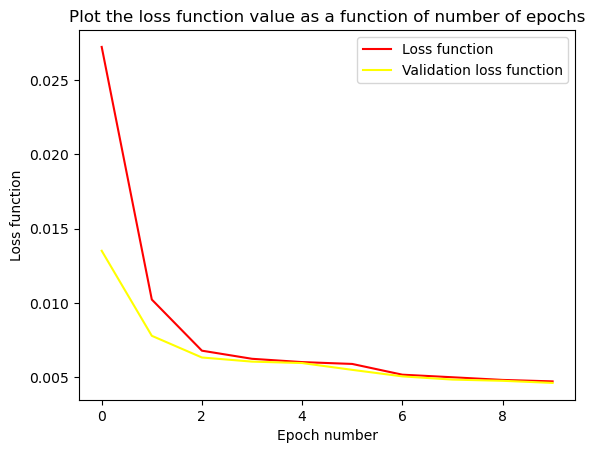

In [192]:
evaluate_model(modeltest1.cae ,'test1.csv')

Trying the RELU acttivation function while keeping everthing else constant to see if it improves the mean square error.

In [193]:
modeltest2 = Training('relu', 'linear','linear',[100, 100, 50, 50], 10, 'normal', 'adam', X_train, 'test2', 10)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_56 (Dense)            (None, 100)               4000      
                                                                 
 dense_57 (Dense)            (None, 50)                5050      
                                                                 
 dense_58 (Dense)            (None, 50)                2550      
                                                                 
 dense_59 (Dense)            (None, 10)                510       
                                                                 
Total params: 12,110
Trainable params: 12,110
Non-trainable params: 0
_________________________________________________________________
3
3
2
1
Model: "model_13"
____________________________

C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 4s 18us/sample - loss: 0.0304 - MSE: 0.0304 - val_loss: 0.0174 - val_MSE: 0.0174
Epoch 2/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0154 - MSE: 0.0154 - val_loss: 0.0135 - val_MSE: 0.0135
Epoch 3/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0124 - MSE: 0.0124 - val_loss: 0.0111 - val_MSE: 0.0111
Epoch 4/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0106 - MSE: 0.0106 - val_loss: 0.0099 - val_MSE: 0.0099
Epoch 5/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0092 - MSE: 0.0092 - val_loss: 0.0088 - val_MSE: 0.0088
Epoch 6/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0077 - MSE: 0.0077 - val_loss: 0.0072 - val_MSE: 0.0072
Epoch 7/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0069 - MSE: 0.0069 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 8/10
217771/217771

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_12 (Functional)       (None, 10)                12110     
                                                                 
 model_13 (Functional)       (None, 39)                12139     
                                                                 
Total params: 24,249
Trainable params: 24,249
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 0.0046528825
Mean squared error(test):  0.0046769073


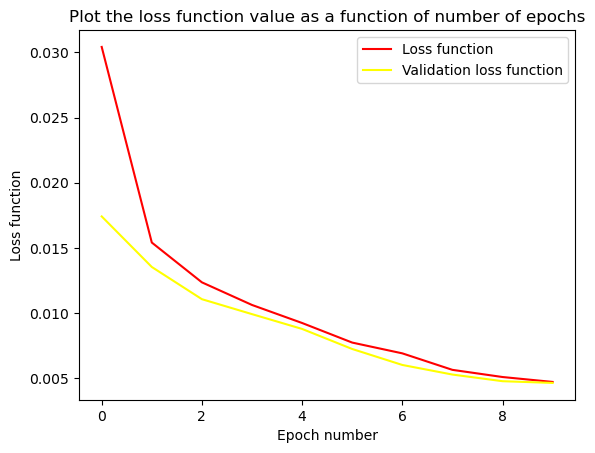

In [194]:
evaluate_model(modeltest2.cae ,'test2.csv')

Changing the activation function to relu made very little difference to the outcome of the mean squared error. 
Since the tanh activation function was slightly better, I will keep using it for the hidden layers.

Changing the output of the encoder model to the tanh activation function

In [195]:
modeltest3 = Training('tanh', 'tanh','linear',[100, 100, 50, 50], 10, 'normal', 'adam', X_train, 'test3', 10)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_64 (Dense)            (None, 100)               4000      
                                                                 
 dense_65 (Dense)            (None, 50)                5050      
                                                                 
 dense_66 (Dense)            (None, 50)                2550      
                                                                 
 dense_67 (Dense)            (None, 10)                510       
                                                                 
Total params: 12,110
Trainable params: 12,110
Non-trainable params: 0
_________________________________________________________________
3
3
2
1
Model: "model_15"
____________________________

C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 4s 17us/sample - loss: 0.0278 - MSE: 0.0278 - val_loss: 0.0150 - val_MSE: 0.0150
Epoch 2/10
217771/217771 [==============================] - 3s 16us/sample - loss: 0.0102 - MSE: 0.0102 - val_loss: 0.0085 - val_MSE: 0.0085
Epoch 3/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0084 - MSE: 0.0084 - val_loss: 0.0080 - val_MSE: 0.0080
Epoch 4/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0074 - MSE: 0.0074 - val_loss: 0.0069 - val_MSE: 0.0069
Epoch 5/10
217771/217771 [==============================] - 3s 16us/sample - loss: 0.0065 - MSE: 0.0065 - val_loss: 0.0062 - val_MSE: 0.0062
Epoch 6/10
217771/217771 [==============================] - 3s 16us/sample - loss: 0.0061 - MSE: 0.0061 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 7/10
217771/217771 [==============================] - 3s 15us/sample - loss: 0.0060 - MSE: 0.0060 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 8/10
217771/217771

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_14 (Functional)       (None, 10)                12110     
                                                                 
 model_15 (Functional)       (None, 39)                12139     
                                                                 
Total params: 24,249
Trainable params: 24,249
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 0.0050022826
Mean squared error(test):  0.005012099


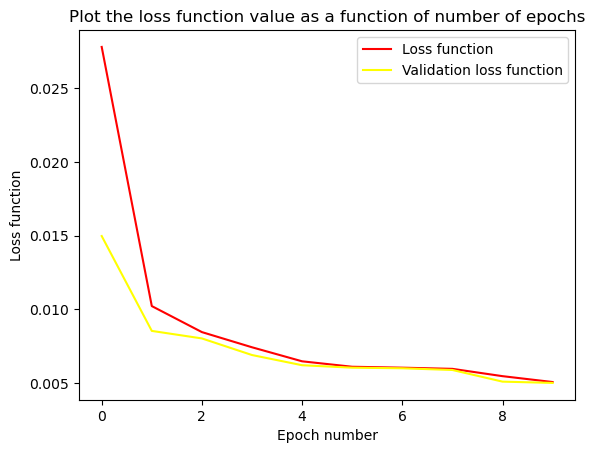

In [196]:
evaluate_model(modeltest3.cae ,'test3.csv')

Using the Linear activation function for the output layer gives a better value for the mean squared error. <br>
Next, trying 3 hidden layers for the encoder and decoder. 

In [199]:
modeltest4 = Training('tanh', 'linear','linear',[100, 100, 50], 10, 'normal', 'adam', X_train, 'test4', 10)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_78 (Dense)            (None, 100)               4000      
                                                                 
 dense_79 (Dense)            (None, 50)                5050      
                                                                 
 dense_80 (Dense)            (None, 10)                510       
                                                                 
Total params: 9,560
Trainable params: 9,560
Non-trainable params: 0
_________________________________________________________________
2
2
1
Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(N

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_18 (Functional)       (None, 10)                9560      
                                                                 
 model_19 (Functional)       (None, 39)                9589      
                                                                 
Total params: 19,149
Trainable params: 19,149
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 0.004833009
Mean squared error(test):  0.0048440746


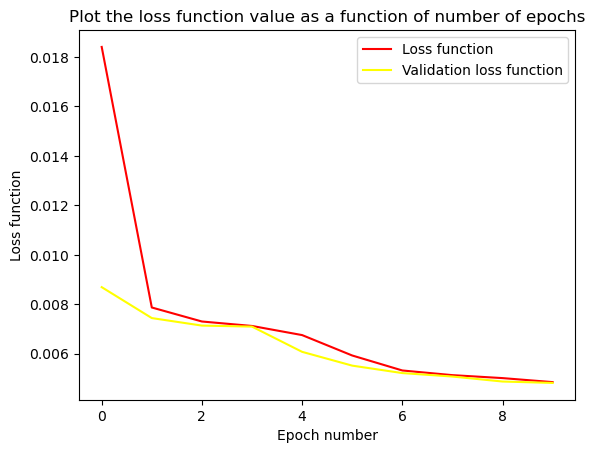

In [200]:
evaluate_model(modeltest4.cae ,'test4.csv')

The model was slightly better with four layers. <br>
Trying five hidden layers

In [201]:
modeltest5 = Training('tanh', 'linear','linear',[100, 100,100,50,50], 10, 'normal', 'adam', X_train, 'test5', 10)

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_84 (Dense)            (None, 100)               4000      
                                                                 
 dense_85 (Dense)            (None, 100)               10100     
                                                                 
 dense_86 (Dense)            (None, 50)                5050      
                                                                 
 dense_87 (Dense)            (None, 50)                2550      
                                                                 
 dense_88 (Dense)            (None, 10)                510       
                                                                 
Total params: 22,210
Trainable params: 22,210
Non-trainabl

C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 5s 21us/sample - loss: 0.0295 - MSE: 0.0295 - val_loss: 0.0190 - val_MSE: 0.0190
Epoch 2/10
217771/217771 [==============================] - 4s 19us/sample - loss: 0.0145 - MSE: 0.0145 - val_loss: 0.0121 - val_MSE: 0.0121
Epoch 3/10
217771/217771 [==============================] - 4s 18us/sample - loss: 0.0105 - MSE: 0.0105 - val_loss: 0.0086 - val_MSE: 0.0086
Epoch 4/10
217771/217771 [==============================] - 4s 19us/sample - loss: 0.0081 - MSE: 0.0081 - val_loss: 0.0071 - val_MSE: 0.0071
Epoch 5/10
217771/217771 [==============================] - 4s 18us/sample - loss: 0.0072 - MSE: 0.0072 - val_loss: 0.0071 - val_MSE: 0.0071
Epoch 6/10
217771/217771 [==============================] - 4s 19us/sample - loss: 0.0066 - MSE: 0.0066 - val_loss: 0.0060 - val_MSE: 0.0060
Epoch 7/10
217771/217771 [==============================] - 4s 18us/sample - loss: 0.0059 - MSE: 0.0059 - val_loss: 0.0059 - val_MSE: 0.0059
Epoch 8/10
217771/217771

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_20 (Functional)       (None, 10)                22210     
                                                                 
 model_21 (Functional)       (None, 39)                22239     
                                                                 
Total params: 44,449
Trainable params: 44,449
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 0.004798955
Mean squared error(test):  0.0048159226


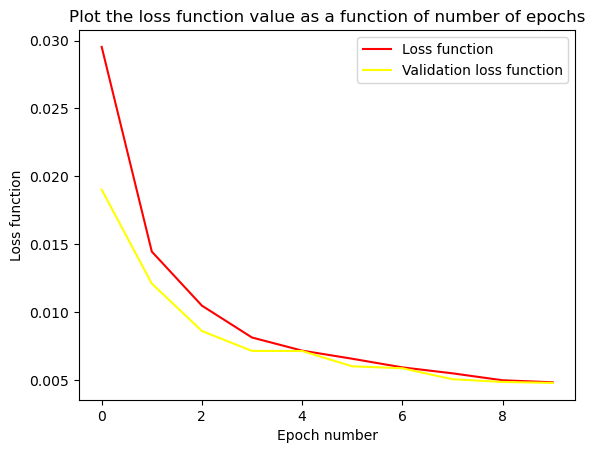

In [202]:
evaluate_model(modeltest5.cae ,'test5.csv')

Still, the initial model gives the best value for mse. 
Trying the model with a latent vector of 25

In [203]:
modeltest6 = Training('tanh', 'linear','linear',[100, 100,50,50], 25, 'normal', 'adam', X_train, 'test6', 10)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_94 (Dense)            (None, 100)               4000      
                                                                 
 dense_95 (Dense)            (None, 50)                5050      
                                                                 
 dense_96 (Dense)            (None, 50)                2550      
                                                                 
 dense_97 (Dense)            (None, 25)                1275      
                                                                 
Total params: 12,875
Trainable params: 12,875
Non-trainable params: 0
_________________________________________________________________
3
3
2
1
Model: "model_23"
____________________________

C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 4s 20us/sample - loss: 0.0246 - MSE: 0.0246 - val_loss: 0.0119 - val_MSE: 0.0119
Epoch 2/10
217771/217771 [==============================] - 4s 17us/sample - loss: 0.0066 - MSE: 0.0066 - val_loss: 0.0043 - val_MSE: 0.0043
Epoch 3/10
217771/217771 [==============================] - 3s 16us/sample - loss: 0.0036 - MSE: 0.0036 - val_loss: 0.0027 - val_MSE: 0.0027
Epoch 4/10
217771/217771 [==============================] - 4s 18us/sample - loss: 0.0026 - MSE: 0.0026 - val_loss: 0.0022 - val_MSE: 0.0022
Epoch 5/10
217771/217771 [==============================] - 4s 18us/sample - loss: 0.0020 - MSE: 0.0020 - val_loss: 0.0017 - val_MSE: 0.0017
Epoch 6/10
217771/217771 [==============================] - 4s 17us/sample - loss: 0.0015 - MSE: 0.0015 - val_loss: 0.0013 - val_MSE: 0.0013
Epoch 7/10
217771/217771 [==============================] - 3s 16us/sample - loss: 0.0012 - MSE: 0.0012 - val_loss: 9.9722e-04 - val_MSE: 9.9722e-04
Epoch 8/10
21777

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_22 (Functional)       (None, 25)                12875     
                                                                 
 model_23 (Functional)       (None, 39)                12889     
                                                                 
Total params: 25,764
Trainable params: 25,764
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 0.00066720706
Mean squared error(test):  0.0006644027


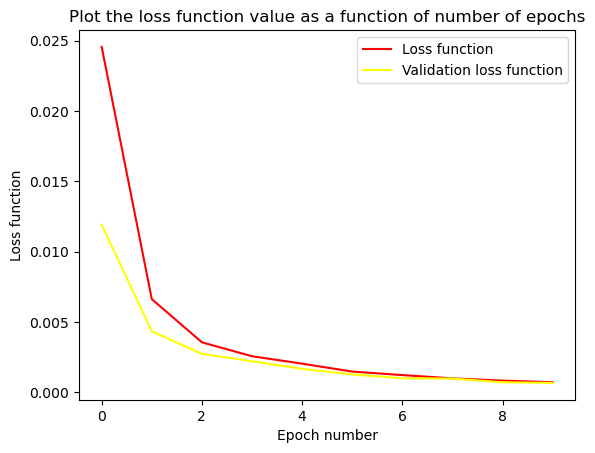

In [204]:
evaluate_model(modeltest6.cae ,'test6.csv')

Using a latent vector of length 25 gives a much improved mse. 
Lastly, checking if the model improves with a kernel_initisation set to uniform

In [205]:
modeltest7 = Training('tanh', 'linear','linear',[100, 100,50,50], 25, 'uniform', 'adam', X_train, 'test7', 10)

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_102 (Dense)           (None, 100)               4000      
                                                                 
 dense_103 (Dense)           (None, 50)                5050      
                                                                 
 dense_104 (Dense)           (None, 50)                2550      
                                                                 
 dense_105 (Dense)           (None, 25)                1275      
                                                                 
Total params: 12,875
Trainable params: 12,875
Non-trainable params: 0
_________________________________________________________________
3
3
2
1
Model: "model_25"
____________________________

C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 4s 20us/sample - loss: 0.0337 - MSE: 0.0337 - val_loss: 0.0264 - val_MSE: 0.0264
Epoch 2/10
217771/217771 [==============================] - 4s 17us/sample - loss: 0.0205 - MSE: 0.0205 - val_loss: 0.0165 - val_MSE: 0.0165
Epoch 3/10
217771/217771 [==============================] - 4s 17us/sample - loss: 0.0149 - MSE: 0.0149 - val_loss: 0.0119 - val_MSE: 0.0119
Epoch 4/10
217771/217771 [==============================] - 4s 17us/sample - loss: 0.0108 - MSE: 0.0108 - val_loss: 0.0082 - val_MSE: 0.0082
Epoch 5/10
217771/217771 [==============================] - 4s 16us/sample - loss: 0.0070 - MSE: 0.0070 - val_loss: 0.0062 - val_MSE: 0.0062
Epoch 6/10
217771/217771 [==============================] - 4s 16us/sample - loss: 0.0062 - MSE: 0.0062 - val_loss: 0.0061 - val_MSE: 0.0061
Epoch 7/10
217771/217771 [==============================] - 4s 16us/sample - loss: 0.0054 - MSE: 0.0054 - val_loss: 0.0047 - val_MSE: 0.0047
Epoch 8/10
217771/217771

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_24 (Functional)       (None, 25)                12875     
                                                                 
 model_25 (Functional)       (None, 39)                12889     
                                                                 
Total params: 25,764
Trainable params: 25,764
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 0.0024283605
Mean squared error(test):  0.0024467127


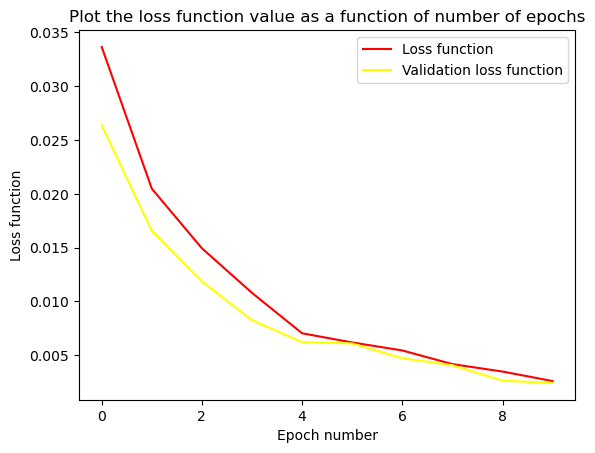

In [206]:
evaluate_model(modeltest7.cae ,'test7.csv')

#### Traing the best model for 100 epaoch

In [413]:
modeltest = Training('tanh', 'linear','linear',[100, 100,50,50], 25, 'normal', 'adam', X_train, 'best_model', 100)

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_118 (Dense)           (None, 100)               4000      
                                                                 
 dense_119 (Dense)           (None, 50)                5050      
                                                                 
 dense_120 (Dense)           (None, 50)                2550      
                                                                 
 dense_121 (Dense)           (None, 25)                1275      
                                                                 
Total params: 12,875
Trainable params: 12,875
Non-trainable params: 0
_________________________________________________________________
3
3
2
1
Model: "model_29"
____________________________

C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


217771/217771 [==============================] - 10s 44us/sample - loss: 0.0238 - MSE: 0.0238 - val_loss: 0.0110 - val_MSE: 0.0110
Epoch 2/100
217771/217771 [==============================] - 7s 34us/sample - loss: 0.0075 - MSE: 0.0075 - val_loss: 0.0053 - val_MSE: 0.0053
Epoch 3/100
217771/217771 [==============================] - 8s 38us/sample - loss: 0.0047 - MSE: 0.0047 - val_loss: 0.0043 - val_MSE: 0.0043
Epoch 4/100
217771/217771 [==============================] - 6s 29us/sample - loss: 0.0030 - MSE: 0.0030 - val_loss: 0.0027 - val_MSE: 0.0027
Epoch 5/100
217771/217771 [==============================] - 6s 27us/sample - loss: 0.0024 - MSE: 0.0024 - val_loss: 0.0020 - val_MSE: 0.0020
Epoch 6/100
217771/217771 [==============================] - 7s 31us/sample - loss: 0.0017 - MSE: 0.0017 - val_loss: 0.0015 - val_MSE: 0.0015
Epoch 7/100
217771/217771 [==============================] - 6s 28us/sample - loss: 0.0013 - MSE: 0.0013 - val_loss: 0.0011 - val_MSE: 0.0011
Epoch 8/100
21777

217771/217771 [==============================] - 6s 30us/sample - loss: 5.7691e-05 - MSE: 5.7691e-05 - val_loss: 6.6764e-05 - val_MSE: 6.6764e-05
Epoch 54/100
217771/217771 [==============================] - 6s 26us/sample - loss: 5.7308e-05 - MSE: 5.7307e-05 - val_loss: 6.1328e-05 - val_MSE: 6.1328e-05
Epoch 55/100
217771/217771 [==============================] - 6s 27us/sample - loss: 5.7511e-05 - MSE: 5.7511e-05 - val_loss: 5.5308e-05 - val_MSE: 5.5308e-05
Epoch 56/100
217771/217771 [==============================] - 7s 32us/sample - loss: 5.7154e-05 - MSE: 5.7154e-05 - val_loss: 5.9154e-05 - val_MSE: 5.9154e-05
Epoch 57/100
217771/217771 [==============================] - 6s 27us/sample - loss: 5.6723e-05 - MSE: 5.6723e-05 - val_loss: 5.5449e-05 - val_MSE: 5.5449e-05
Epoch 58/100
217771/217771 [==============================] - 6s 28us/sample - loss: 5.7121e-05 - MSE: 5.7121e-05 - val_loss: 5.7061e-05 - val_MSE: 5.7061e-05
Epoch 59/100
217771/217771 [==============================]

Model: "ConvAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 39)]              0         
                                                                 
 model_28 (Functional)       (None, 25)                12875     
                                                                 
 model_29 (Functional)       (None, 39)                12889     
                                                                 
Total params: 25,764
Trainable params: 25,764
Non-trainable params: 0
_________________________________________________________________
Mean squared error(train): 3.0576382e-05
Mean squared error(test):  3.0364243e-05


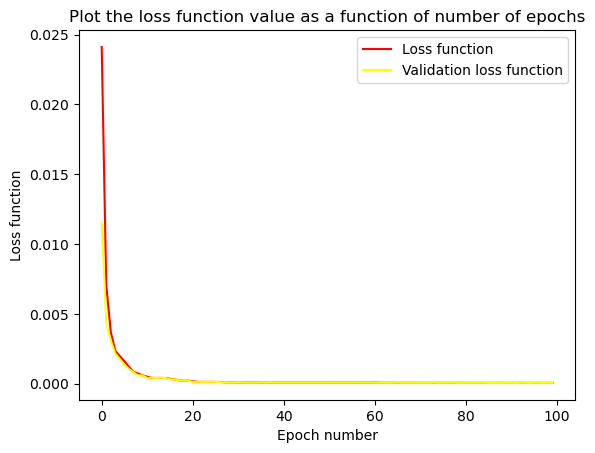

In [416]:
evaluate_model(modeltest.cae ,'best_model.csv')

### Evaluation

In [218]:
BSM_data = [chacha_cha300,chacha_cha400,chacha_cha600,chaneut_cha200,chaneut_cha250,pp23mt_50,pp24mt_50, gluino_1000,st1p_st1000 ]
eval_BSM = []
for i in BSM_data:
    model_eval = modeltest.cae.evaluate(i ,i, verbose = False)[1]
    eval_BSM.append(model_eval)




|Model | File Name | MSE of autoencoder model on BSM data |
|---|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`| 4.813e-05|
||`chacha_cha400_neut60_chan2b.csv`| 7.695e-05 |
||`chacha_cha600_neut200_chan2b.csv`| 7.856e-05 |
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`| 0.000153 |
||`chaneut_cha250_neut150_chan2b.csv`| 0.000150 |
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`| 0.000351|
||`pp24mt_50_chan2b.csv`| 0.000903 |
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`| 0.00233 |
||`stlp_st1000_chan2b.csv`| 0.00121|



As seen from the table, the SUSY chargino-chragino processes are more similar to the standard model compared to the other models. The Gluino ans RPV SUVY processes are the most distinct from the standard model.


The MSE method below returns the mean squared error for every event in the dataset 

In [214]:
def MSE(original, prediction):
    mse = np.square(original - prediction)
    mse = np.mean(mse, axis = 1)
    return mse
    

In [215]:
X_predict = modeltest.cae.predict(X_test) # prediction of model on testing dataset of SM
mse_train = MSE(X_test , X_predict)     # mse of events in testing dataset of SM



C:\Users\boazm\anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


The histogram_threshold function below plots the histogram distribution of the mse of the testing dataset of the SM and the histogram of the mse of the BSM dataset.<br>
It calculates the mse of every event in the BSM data

In [376]:
def histogram_threshold(test_data , mse_train_data, title, y_limit =100000 ):
    test_predict = modeltest.cae.predict(test_data)
    mse_test = MSE(test_data, test_predict)    
    fig, ax = plt.subplots()
    ax.hist(mse_train_data, 1000, density=True, facecolor='g', alpha=0.75, label='MSE for SM data')
    ax.hist(mse_test, 1000, density=True, facecolor='b', alpha=0.75, label = 'MSE for BSM')
    plt.xlabel('Mean square error')
    plt.ylabel('Counts')
    plt.title(title)
    ax.legend()
    ax.set_xlim(0, 0.0005)
    ax.set_ylim(0, y_limit)
    plt.show()

The threshold_plot function below defines a range of thresholds. 
For each threshold, it calculates the fraction of SM events that are below the threshold and the fraction of BSM events that are above the threshold. These fractions are the background and signal efficiency, respectively. 
The function then plots how both efficeincies change with threshold.

In [344]:
def threshold_plot(mse_train, test_data):
    
    test_predict = modeltest.cae.predict(test_data)
    threshold1 = np.linspace(0, 0.00009, 1000)   # defining the thresholds
    mse_test = MSE(test_data, test_predict)

    background_eff = []
    signal_eff = []

    for i in threshold1:
        background_eff.append((np.sum(mse_train < i)/(mse_train.shape))) # background efficiency
        signal_eff.append((np.sum(mse_test > i))/(mse_test.shape))  # signal efficiency
    
    diff = np.array(background_eff) - np.array(signal_eff)
    x_intersect = threshold1[np.argmin(np.abs(diff))]         # getting the intersect of curves


    
    # Create a figure and subplots
    fig, ax = plt.subplots()

    # Plot the first line graph
    ax.plot(threshold1, background_eff, color='b', label='background_efficiency')

    # Plot the second line graph
    ax.plot(threshold1, signal_eff, color = 'r', label='signal_efficiency')
    
    ax.axvline(x=x_intersect, color='g', linestyle='--', label = 'Threshold: ' + str(round(x_intersect,7)))
    
    plt.xlabel('threshold')
    plt.ylabel('efficiency')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()



The best threshold of the model on each of the BSM datasets was obtained by getting the intersection of the background and signal efficiency curves. The intersection point balances the trade-off between the identification of true BSM events and the rejection of false SM events.<br>
Below, I have plotted the histogram of the mse of the test SM data and the histogram of the mse of the BSM data on the same axis. This gives me an idea of the threshold range to scan.<br>
Also, I have plotted the signal and background efficiency on the same axis to show the threshold.



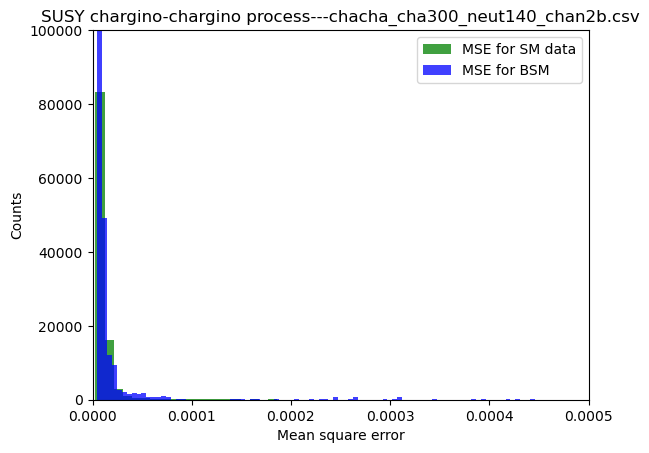

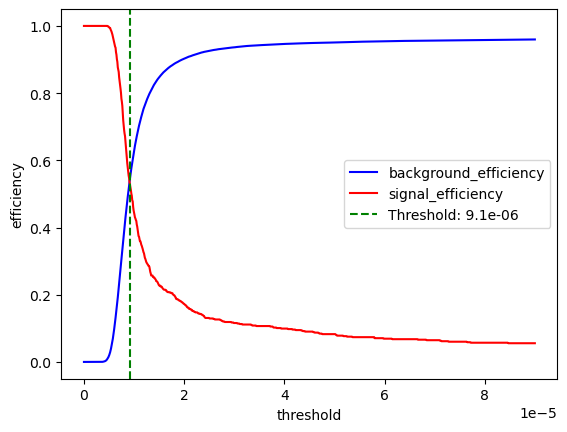

In [377]:
histogram_threshold(BSM_data[0], mse_train, title = "SUSY chargino-chargino process---chacha_cha300_neut140_chan2b.csv")
threshold_plot(mse_train, BSM_data[0])

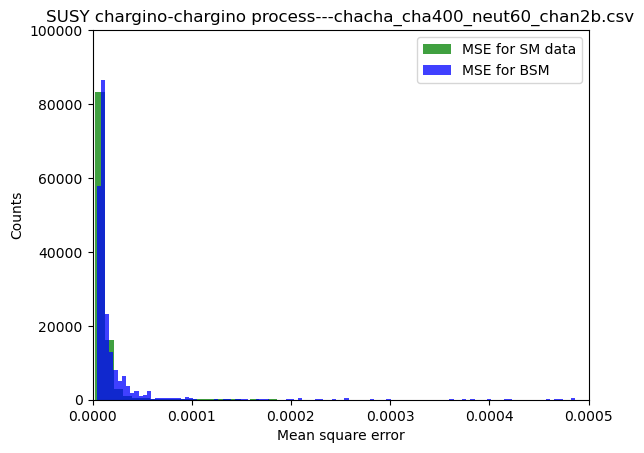

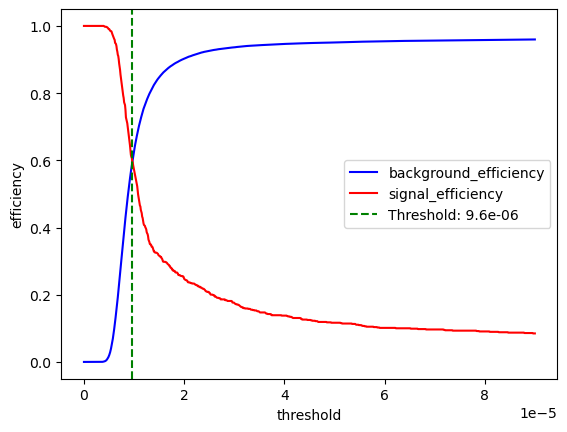

In [378]:
histogram_threshold(BSM_data[1], mse_train, title = "SUSY chargino-chargino process---chacha_cha400_neut60_chan2b.csv")
threshold_plot(mse_train, BSM_data[1])


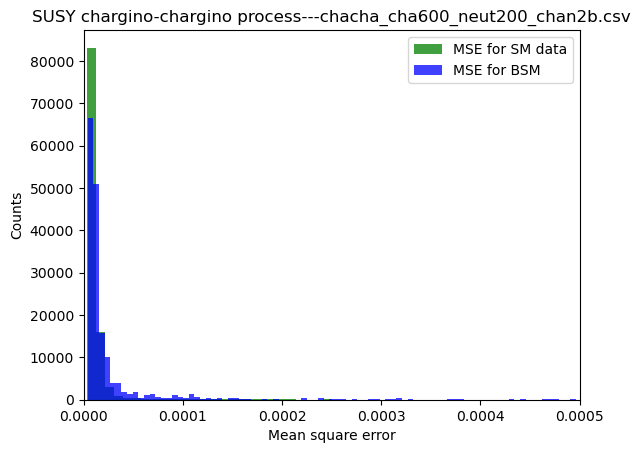

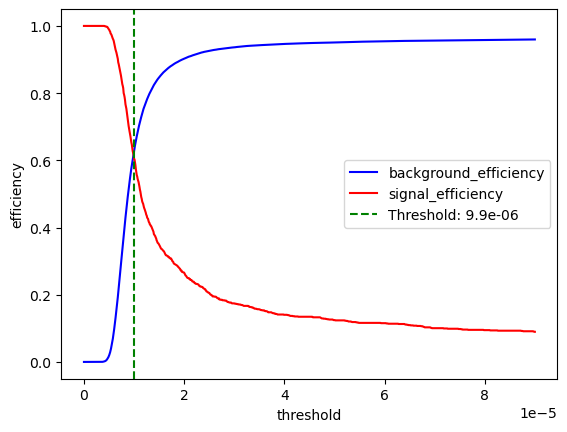

In [358]:
histogram_threshold(BSM_data[2], mse_train, title = "SUSY chargino-chargino process---chacha_cha600_neut200_chan2b.csv")
threshold_plot(mse_train, BSM_data[2])


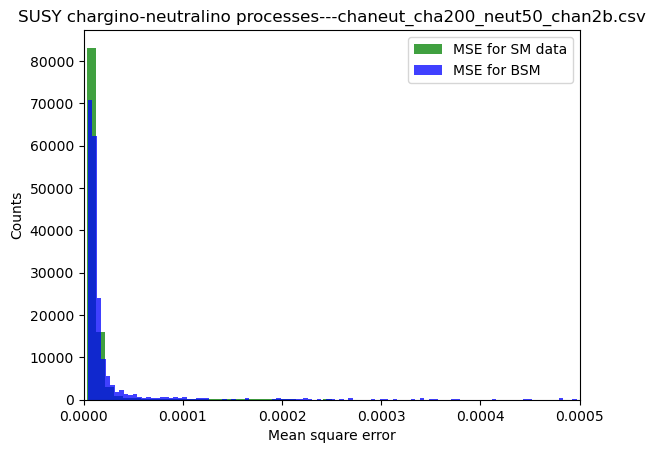

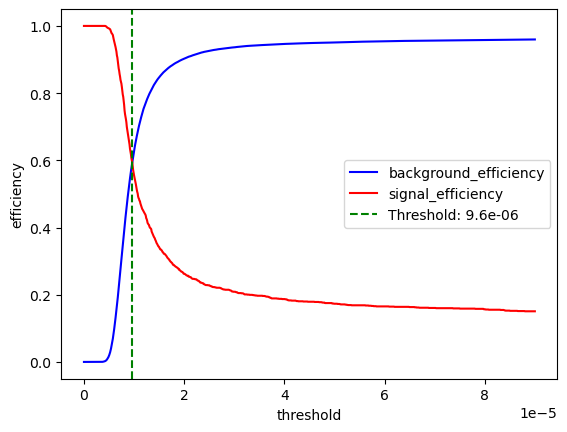

In [359]:
histogram_threshold(BSM_data[3], mse_train, title = "SUSY chargino-neutralino processes---chaneut_cha200_neut50_chan2b.csv")
threshold_plot(mse_train, BSM_data[3])


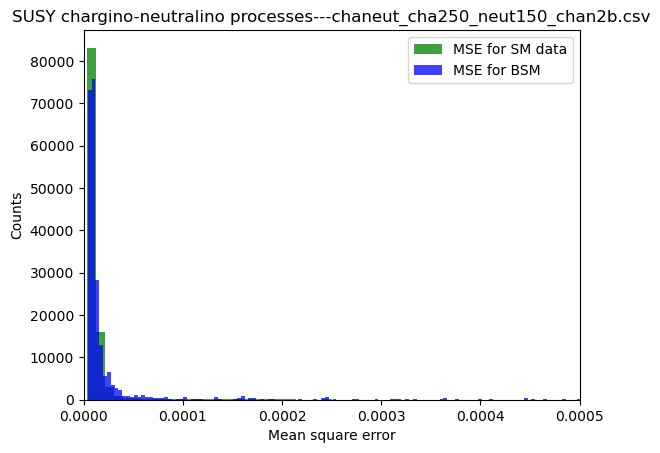

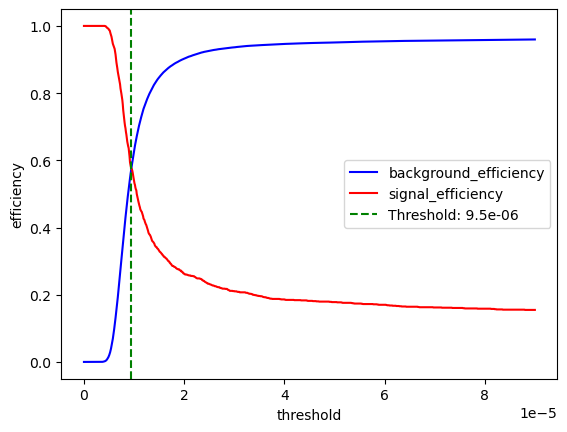

In [360]:
histogram_threshold(BSM_data[4], mse_train, title = "SUSY chargino-neutralino processes---chaneut_cha250_neut150_chan2b.csv")
threshold_plot(mse_train, BSM_data[4])

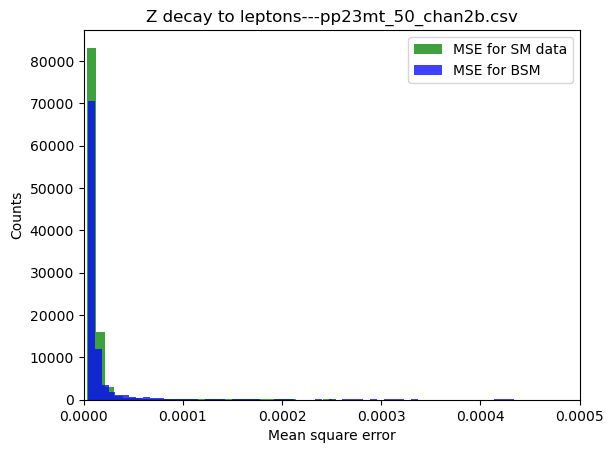

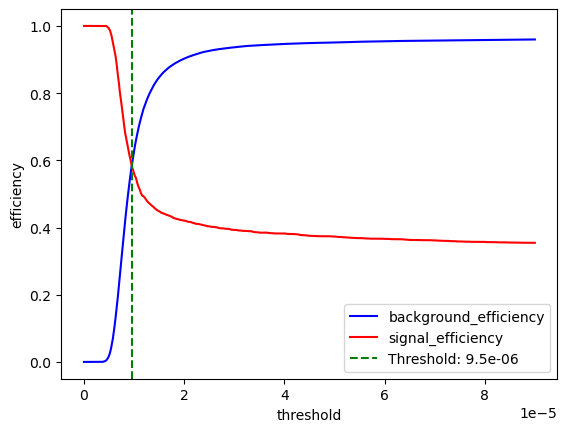

In [361]:
histogram_threshold(BSM_data[5], mse_train, title = "Z decay to leptons---pp23mt_50_chan2b.csv")
threshold_plot(mse_train, BSM_data[5])


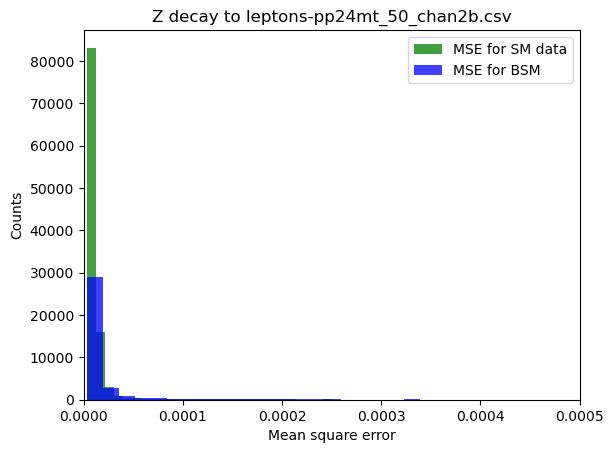

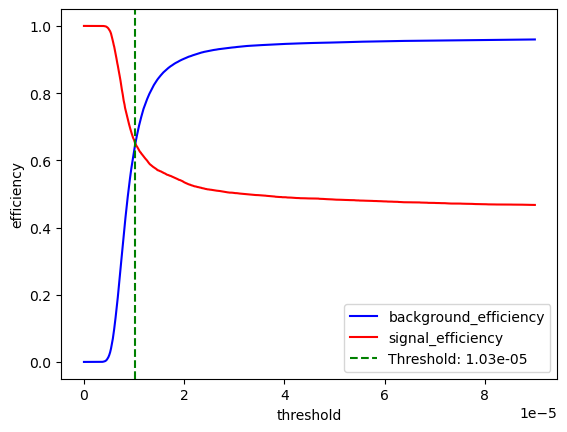

In [362]:
histogram_threshold(BSM_data[6], mse_train, title = "Z decay to leptons-pp24mt_50_chan2b.csv")
threshold_plot(mse_train, BSM_data[6])


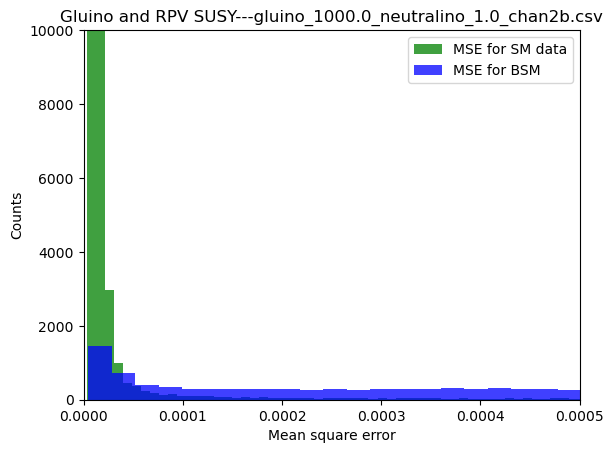

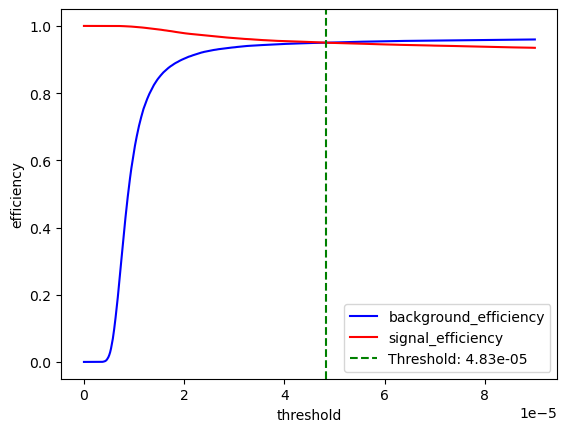

In [379]:
histogram_threshold(BSM_data[7], mse_train, title = "Gluino and RPV SUSY---gluino_1000.0_neutralino_1.0_chan2b.csv", y_limit= 10000)
threshold_plot(mse_train, BSM_data[7])


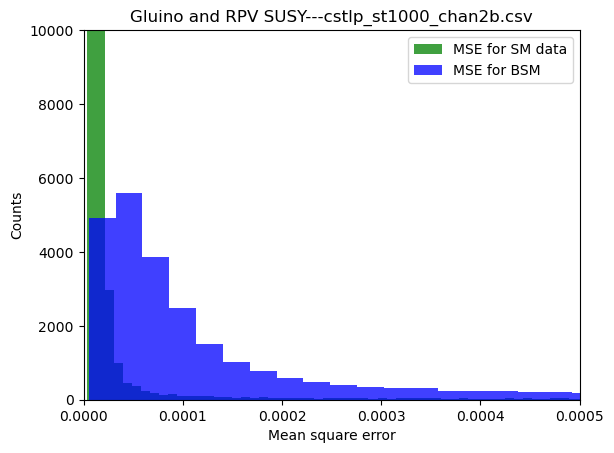

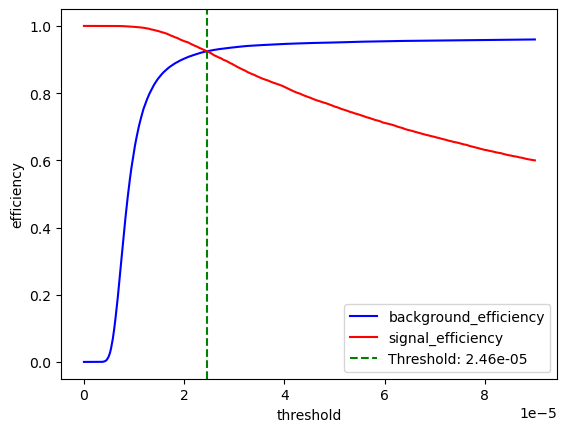

In [380]:
histogram_threshold(BSM_data[8], mse_train, title = "Gluino and RPV SUSY---cstlp_st1000_chan2b.csv", y_limit= 10000)
threshold_plot(mse_train, BSM_data[8])

|Model | File Name |Best Threshold |
|---|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`| 9.1e-06|
||`chacha_cha400_neut60_chan2b.csv`| 9.6e-06 |
||`chacha_cha600_neut200_chan2b.csv`| 9.9e-06 |
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`| 9.6e-06 |
||`chaneut_cha250_neut150_chan2b.csv`| 9.5e-06 |
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`| 9.5e-06|
||`pp24mt_50_chan2b.csv`| 1.03e-05 |
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`| 4.83e-05 |
||`stlp_st1000_chan2b.csv`| 2.46e-05|



The "Best Threshold" column shows the threshold for the mean square error of events in each BSM dataset. Above each respective threshold for the corresponding BSM dataset, the event is considered a non-SM event.  <br>
For an event whose BSM dataset is not known, the event may be considered a non-SM event if it's mse is above 4.83e-05.

### Testing SM dataset

In order to investigate which particlar features make some of the SM events look more anomolous, I have added an extra column to the SM testing dataset. The column represents the reconstruction error of the events. The testing dataset was then ordered in ascending order according to the mean sqaure error. The first 1000 events with the least mse were then selected and, their particular features were compared to 1000 events with the largest mse.

In [404]:
X_predict = modeltest.cae.predict(X_test) # prediction of the model
mse_train = MSE(X_test , X_predict) # getting the mse of the  events in the testing dataset
X_reversed = X_test*(np.max(bgb.data, axis=0) - np.min(bgb.data, axis=0)) + np.min(bgb.data, axis=0) # un-scaling the testing dataset
X_test_new = np.column_stack((X_reversed, mse_train)) #adding the mse to each event in a column

#sorting the dataset in ascending order of mse 
X_test_sorted = X_test_new[X_test_new[:,-1].argsort()]

#getting the 1000 best events in the testing dataset
X_test_best = X_test_sorted[:1000]

#getting the 1000 worst events in the testing dataset
X_test_worst = X_test_sorted[-1000:]

n, bins, patches = plt.hist(X_test_best[:,6], 50, density=True, facecolor='g', alpha=0.75)
n, bins, patches = plt.hist(X_test_worst[:,6], 50, density=True, facecolor='b', alpha=0.75)

### Particle counts effect on SM dataset

The code below investigates if there is a thrend between the total number of particles in an event and how anonmolous the event is.

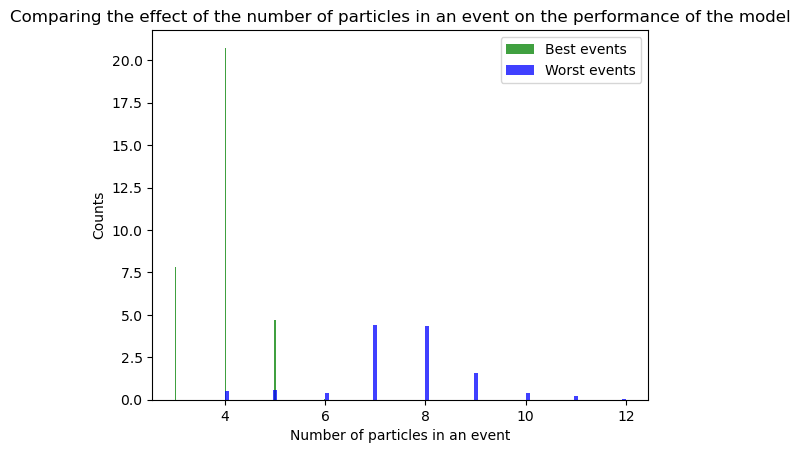

In [406]:
particle_counts_best = np.sum(X_test_best[:, :5], axis=1)
particle_counts_worst = np.sum(X_test_worst[:, :5], axis=1)
fig, ax = plt.subplots()
ax.hist(particle_counts_best, 100, density=True, facecolor='g', alpha=0.75, label='Best events')
ax.hist(particle_counts_worst, 100, density=True, facecolor='b', alpha=0.75, label = 'Worst events')
plt.xlabel('Number of particles in an event')
plt.ylabel('Counts')
plt.title('Comparing the effect of the number of particles in an event on the performance of the model')
ax.legend()
plt.show()

The histogram shows that events with five or fewer particles are more SM-like than events with more particles. If I had more time, I will train the model on SM data with only five or fewer particles and compare the performanace of the model. 

### METphi range

The code investigates if there is a significant difference between the METphi of the best events and the METphi of the worst events.

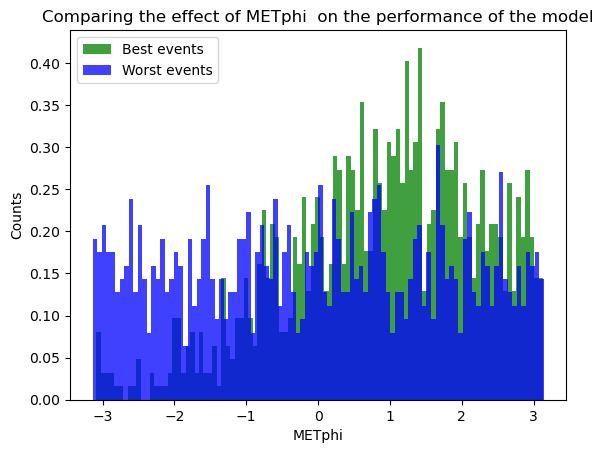

In [409]:
fig, ax = plt.subplots()
ax.hist(X_test_best[:,6], 100, density=True, facecolor='g', alpha=0.75, label='Best events')
ax.hist(X_test_worst[:,6], 100, density=True, facecolor='b', alpha=0.75, label = 'Worst events')
plt.xlabel('METphi')
plt.ylabel('Counts')
plt.title('Comparing the effect of METphi  on the performance of the model')
ax.legend()
plt.show()

As shown by the histogram, the METphi range for the best and worst model are almost equal. This suggests that the METphi value have little effect on how anomolous an event is. 

###  MET 

The code investigates if there is a significant difference between the MET of the best events and the METphi of the worst events.

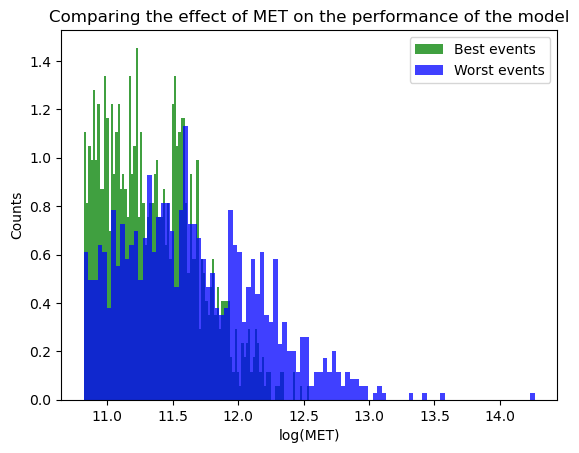

In [411]:
fig, ax = plt.subplots()
ax.hist(X_test_best[:,5], 100, density=True, facecolor='g', alpha=0.75, label='Best events')
ax.hist(X_test_worst[:,5], 100, density=True, facecolor='b', alpha=0.75, label = 'Worst events')
plt.xlabel('log(MET)')
plt.ylabel('Counts')
plt.title('Comparing the effect of MET on the performance of the model')
ax.legend()
plt.show()

From the histogram, it is clear that events with a log(MET) value greater than 12.5 represent the events with the worst mse.  Hence, the effect of the MET value on how anomolous an event is, becomes significant when the MET value is very large.  

### Discussion

The mean square error of the model on the standard model dataset is 4.82e-05 .The autoencoder model was able to identiy the Gluino and RPV SUSY processes as BSM with a reconstruction error of 0.00233 and 0.00121 for both channels. For the other processes, the reconstructed error for their events and the SM events were close.Hence, either the predictions from these models differ slightly from the SM predictions or, the autoendocer failed at distinguishing them. <br>
To improve on this project, I would have trained the model using only the first four energetic particles in an event. Also, I would have have tried using different models such as variational autoencoders and convolutional variational autoencoder